In [ ]:
import csv
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
sys.path.insert(0,"/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(pd.__version__)

1.5.3


In [ ]:
review=pd.read_csv("/content/drive/MyDrive/nlp_data/review_processed.csv")

In [ ]:
review.head()

,review_id,business_id,stars,text,processed_text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,decide eat aware go take hour begin end try mu...
1,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite is ...,wow yummy different delicious favorite lamb cu...
2,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,long term frequent customer establishment go o...
3,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,amazingly amazing wings and homemade bleu chee...,amazingly amaze wing homemade bleu cheese ribe...
4,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,good foodloved the gnocchi with marinara the b...,good foodloved gnocchi marinara bake eggplant ...


In [ ]:
print(review.shape)
null_count2=review.isna().sum()
print(null_count2)

(1186583, 5)
review_id         0
business_id       0
stars             0
text              5
processed_text    8
dtype: int64


In [ ]:
review.dropna(inplace=True)

In [ ]:
review_test = review.head(10000)

In [ ]:
#!pip install scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000,max_df=0.85,min_df=6)
tfidf = tfidf_vectorizer.fit_transform(review['processed_text'])
vocab = tfidf_vectorizer.get_feature_names_out()
#print(vocab)

In [ ]:
type(vocab)

numpy.ndarray

In [ ]:
vocab.shape

(4000,)

In [ ]:
print(vocab[0:100])

['ability' 'able' 'absolute' 'absolutely' 'absurd' 'abundance' 'ac'
 'accent' 'accept' 'acceptable' 'access' 'accessible' 'accident'
 'accidentally' 'accommodate' 'accomodating' 'accompaniment' 'accompany'
 'accord' 'accordingly' 'account' 'accurate' 'acidic' 'acknowledge' 'acme'
 'acoustic' 'across' 'act' 'action' 'activity' 'actual' 'actually' 'ad'
 'adam' 'add' 'addict' 'addictive' 'addition' 'additional' 'additionally'
 'address' 'adequate' 'adjacent' 'adjust' 'admit' 'admittedly' 'adorable'
 'adore' 'adult' 'advance' 'advantage' 'adventure' 'adventurous'
 'advertise' 'advice' 'advise' 'aesthetic' 'affect' 'afford' 'affordable'
 'aforementioned' 'afraid' 'african' 'afternoon' 'aftertaste' 'afterwards'
 'age' 'aggressive' 'ago' 'agree' 'ah' 'ahead' 'ahi' 'aid' 'aint' 'aioli'
 'air' 'airport' 'airy' 'aisle' 'aka' 'al' 'ala' 'albeit' 'alcohol'
 'alcoholic' 'ale' 'alert' 'alfredo' 'alike' 'alive' 'alla' 'allergic'
 'allergy' 'alley' 'allow' 'almond' 'almost' 'alone' 'along']


In [ ]:
#tfidf_matrix = tfidf.toarray()
print(tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
LDA = LatentDirichletAllocation(n_components=6, random_state=42)
LDA.fit(tfidf)

LatentDirichletAllocation(n_components=6, random_state=42)

In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['cheesesteak', 'burger', 'place', 'cream', 'ice', 'fry', 'good', 'get', 'cheese', 'sandwich']


Top 10 words for topic #1:
['get', 'restaurant', 'go', 'order', 'dish', 'delicious', 'salad', 'food', 'great', 'good']


Top 10 words for topic #2:
['great', 'rice', 'roll', 'order', 'taco', 'place', 'chicken', 'sushi', 'good', 'food']


Top 10 words for topic #3:
['come', 'say', 'take', 'service', 'wait', 'time', 'go', 'get', 'food', 'order']


Top 10 words for topic #4:
['staff', 'go', 'friendly', 'bar', 'service', 'good', 'beer', 'place', 'food', 'great']


Top 10 words for topic #5:
['order', 'go', 'best', 'get', 'always', 'food', 'great', 'good', 'place', 'pizza']




In [ ]:
#assign probability of all the topics to each document and adds a new column to show about which topic the review belongs
topic_values = LDA.transform(tfidf)
review['Topic'] = topic_values.argmax(axis=1)
review.head(10)

,review_id,business_id,stars,text,processed_text,Topic
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,decide eat aware go take hour begin end try mu...,3
1,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite is ...,wow yummy different delicious favorite lamb cu...,2
2,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,long term frequent customer establishment go o...,3
3,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,amazingly amazing wings and homemade bleu chee...,amazingly amaze wing homemade bleu cheese ribe...,1
4,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,good foodloved the gnocchi with marinara the b...,good foodloved gnocchi marinara bake eggplant ...,1
5,oyaMhzBSwfGgemSGuZCdwQ,YtSqYv1Q_pOltsVPSx54SA,5.0,tremendous service big shout out to douglas th...,tremendous service big shout douglas complemen...,4
6,Xs8Z8lmKkosqW5mw_sVAoA,eFvzHawVJofxSnD7TgbZtg,5.0,my absolute favorite cafe in the city their bl...,absolute favorite cafe city black white latte ...,4
7,G_5UczbCBJriUAbxz3J7Tw,x4XdNhp0Xn8lOivzc77J-g,5.0,best thai food in the area everything was auth...,best thai food area everything authentic delic...,2
8,DyrAIuKl60j_X8Yrrv-kpg,MWmXGQ98KbRo3vsS5nZhMA,5.0,i recently had dinner here with my wife over t...,recently dinner wife weekend could please meal...,1
9,-P5E9BYUaK7s3PwBF5oAyg,bMratNjTG5ZFEA6hVyr-xQ,5.0,first time there and it was excellent it feels...,first time excellent feel like enter someone h...,4


In [ ]:
#Topic Naming
review["topic_name"] = ""
review.loc[review["Topic"] == 0, "topic_name"] = "fastfood like burgers and sandwichs"
review.loc[review["Topic"] == 1, "topic_name"] = "dinner and dessert"
review.loc[review["Topic"] == 2, "topic_name"] = "Asian food"
review.loc[review["Topic"] == 3, "topic_name"] = "waiting time"
review.loc[review["Topic"] == 4, "topic_name"] = "Drinks and staff services"
review.loc[review["Topic"] == 5, "topic_name"] = "pizza"
review.head(10)

,review_id,business_id,stars,text,processed_text,Topic,topic_name
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,decide eat aware go take hour begin end try mu...,3,waiting time
1,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite is ...,wow yummy different delicious favorite lamb cu...,2,Asian food
2,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,long term frequent customer establishment go o...,3,waiting time
3,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,amazingly amazing wings and homemade bleu chee...,amazingly amaze wing homemade bleu cheese ribe...,1,dinner and dessert
4,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,good foodloved the gnocchi with marinara the b...,good foodloved gnocchi marinara bake eggplant ...,1,dinner and dessert
5,oyaMhzBSwfGgemSGuZCdwQ,YtSqYv1Q_pOltsVPSx54SA,5.0,tremendous service big shout out to douglas th...,tremendous service big shout douglas complemen...,4,Drinks and staff services
6,Xs8Z8lmKkosqW5mw_sVAoA,eFvzHawVJofxSnD7TgbZtg,5.0,my absolute favorite cafe in the city their bl...,absolute favorite cafe city black white latte ...,4,Drinks and staff services
7,G_5UczbCBJriUAbxz3J7Tw,x4XdNhp0Xn8lOivzc77J-g,5.0,best thai food in the area everything was auth...,best thai food area everything authentic delic...,2,Asian food
8,DyrAIuKl60j_X8Yrrv-kpg,MWmXGQ98KbRo3vsS5nZhMA,5.0,i recently had dinner here with my wife over t...,recently dinner wife weekend could please meal...,1,dinner and dessert
9,-P5E9BYUaK7s3PwBF5oAyg,bMratNjTG5ZFEA6hVyr-xQ,5.0,first time there and it was excellent it feels...,first time excellent feel like enter someone h...,4,Drinks and staff services


In [ ]:
review.to_csv('/content/drive/MyDrive/nlp_data/review_topic.csv', index=False)

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
pic =pyLDAvis.sklearn.prepare(LDA, tfidf, tfidf_vectorizer)
pic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.111153  0.002313       1        1  19.078124
4     -0.017859 -0.065013       2        1  18.747521
1      0.046424 -0.035770       3        1  18.297319
2      0.063098 -0.012977       4        1  15.972891
0      0.036309  0.064933       5        1  15.602886
5     -0.016818  0.046515       6        1  12.301258, topic_info=          Term          Freq         Total Category  logprob  loglift
2623     pizza  21516.000000  21516.000000  Default  30.0000  30.0000
3477     sushi   9057.000000   9057.000000  Default  29.0000  29.0000
309       beer  14688.000000  14688.000000  Default  28.0000  28.0000
3025  sandwich  15567.000000  15567.000000  Default  27.0000  27.0000
2347    noodle   5847.000000   5847.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
2098      make   3123.429122  22390.195668   Topic6  -5.5515   0.1258
1430  friendly   2913.531219  17653.419299   Topic6  -5.6211   0.2939
3703       try   2833.851234  23114.529888   Topic6  -5.6488  -0.0034
617     cheese   2626.276349  16219.659864   Topic6  -5.7249   0.2748
2835    really   2696.870373  22813.052777   Topic6  -5.6984  -0.0398

[539 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
23        1  0.920778  acknowledge
23        2  0.013930  acknowledge
23        3  0.030646  acknowledge
23        4  0.008358  acknowledge
23        5  0.009751  acknowledge
...     ...       ...          ...
3972      2  0.049143         yell
3972      3  0.018987         yell
3972      4  0.010052         yell
3972      5  0.031273         yell
3972      6  0.020104         yell

[2019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1, 6])

Average star rating for each theme

In [ ]:
average_ratings = review.groupby('topic_name')['stars'].mean()

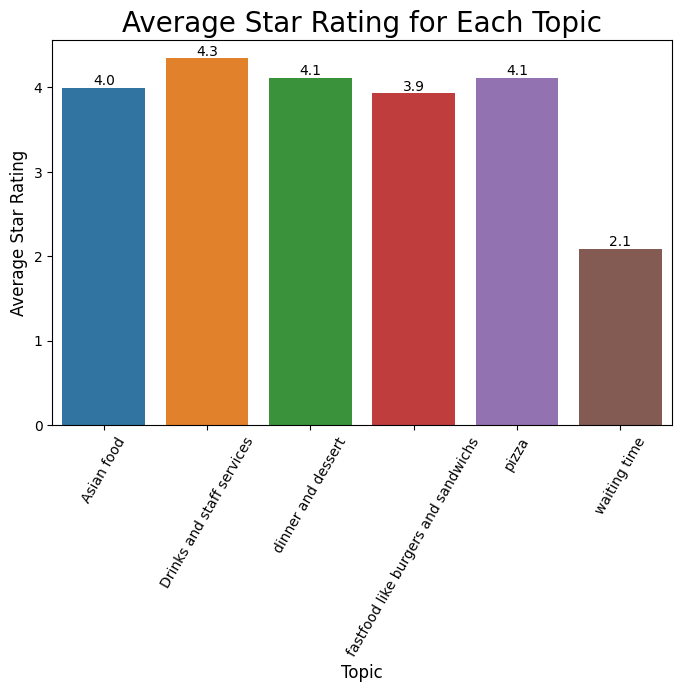

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(8, 5))
axis = sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.title("Average Star Rating for Each Topic",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 60)
plt.ylabel('Average Star Rating', fontsize = 12)
plt.xlabel('Topic', fontsize = 12)

#text labels
r = axis.patches
labels = average_ratings.values.round(1)
for rect, label in zip(r, labels):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')